# Intro to Bayesian Statistics Lab

Complete the following set of exercises to solidify your knowledge of Bayesian statistics and Bayesian data analysis.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 1. Cookie Problem

Suppose we have two bowls of cookies. Bowl 1 contains 30 vanilla cookies and 10 chocolate cookies. Bowl 2 contains 20 of each. You randomly pick one cookie out of one of the bowls, and it is vanilla. Use Bayes Theorem to calculate the probability that the vanilla cookie you picked came from Bowl 1?

In [2]:
priors = [1 / 2, 1 / 2]
likelihoods = [3/4, 1/2]
np.multiply(priors, likelihoods)

array([0.375, 0.25 ])

In [3]:
def bayes_rule(priors, likehoods):
    marg = sum(np.multiply(priors, likelihoods))
    post = np.divide(np.multiply(priors, likelihoods), marg)
    return post

In [4]:
bayes_rule(priors, likelihoods)
#the probability is 0,6

array([0.6, 0.4])

What is the probability that it came from Bowl 2?

In [5]:
#The probability is 0,4

What if the cookie you had picked was chocolate? What are the probabilities that the chocolate cookie came from Bowl 1 and Bowl 2 respectively?

In [6]:
priors = [1 / 2, 1 / 2]
likelihoods = [1/4, 1/2]
np.multiply(priors, likelihoods)

array([0.125, 0.25 ])

In [7]:
def bayes_rule(priors, likehoods):
    marg = sum(np.multiply(priors, likelihoods))
    post = np.divide(np.multiply(priors, likelihoods), marg)
    return post

In [8]:
bayes_rule(priors, likelihoods)
#the probability for bowl 1 is 0,33 and for bowl 2 is 0,66

array([0.33333333, 0.66666667])

## 2. Candy Problem

Suppose you have two bags of candies:

- In Bag 1, the mix of colors is:
    - Brown - 30%
    - Yellow - 20%
    - Red - 20%
    - Green - 10%
    - Orange - 10%
    - Tan - 10%
    
- In Bag 2, the mix of colors is:
    - Blue - 24%
    - Green - 20%
    - Orange - 16%
    - Yellow - 14%
    - Red - 13%
    - Brown - 13%
    
Not knowing which bag is which, you randomly draw one candy from each bag. One is yellow and one is green. What is the probability that the yellow one came from the Bag 1?

*Hint: For the likelihoods, you will need to multiply the probabilities of drawing yellow from one bag and green from the other bag and vice versa.*

In [9]:
#Case for yellow in bag 1 and green in bag 2
#amarillo y verde
priors = [1/2, 1/ 2]
likelihoods = [(20/100)*(20/100), (10/100)*(14/100)]
#bag1 yellow * ba2 green, #bag1 green * bag2 yellow
np.multiply(priors, likelihoods)

array([0.02 , 0.007])

In [10]:
def bayes_rule(priors, likehoods):
    marg = sum(np.multiply(priors, likelihoods))
    post = np.divide(np.multiply(priors, likelihoods), marg)
    return post

In [11]:
#Result
bayes_rule(priors, likelihoods)


array([0.74074074, 0.25925926])

What is the probability that the yellow candy came from Bag 2?

In [12]:
#Case for green in bag 1 and yellow in bag 2
priors = [1/2, 1/2]
likelihoods = [(10/100)*(14/100),(20/100)*(20/100)]
np.multiply(priors, likelihoods)

array([0.007, 0.02 ])

In [13]:
def bayes_rule(priors, likehoods):
    marg = sum(np.multiply(priors, likelihoods))
    post = np.divide(np.multiply(priors, likelihoods), marg)
    return post

In [14]:
#Result
bayes_rule(priors, likelihoods)

array([0.25925926, 0.74074074])

What are the probabilities that the green one came from Bag 1 and Bag 2 respectively?

In [15]:
#Case for green in bag 1 and green in bag 2
priors = [1/2, 1/2]
likelihoods = [(10/100),(20/100)]
#bag1 green, bag2 green
np.multiply(priors, likelihoods)

array([0.05, 0.1 ])

In [16]:
def bayes_rule(priors, likehoods):
    marg = sum(np.multiply(priors, likelihoods))
    post = np.divide(np.multiply(priors, likelihoods), marg)
    return post

In [17]:
#Result
bayes_rule(priors, likelihoods)

array([0.33333333, 0.66666667])

## 3. Monty Hall Problem

Suppose you are a contestant on the popular game show *Let's Make a Deal*. The host of the show (Monty Hall) presents you with three doors - Door A, Door B, and Door C. He tells you that there is a sports car behind one of them and if you choose the correct one, you win the car!

You select Door A, but then Monty makes things a little more interesting. He opens Door B to reveal that there is no sports car behind it and asks you if you would like to stick with your choice of Door A or switch your choice to Door C. Given this new information, what are the probabilities of you winning the car if you stick with Door A versus if you switch to Door C?

In [18]:
#PART 1
priors = [1/3, 1/3, 1/3]
likelihoods = [(1/3),(1/3),(1/3)]
np.multiply(priors, likelihoods)

array([0.11111111, 0.11111111, 0.11111111])

In [19]:
def bayes_rule(priors, likehoods):
    marg = sum(np.multiply(priors, likelihoods))
    post = np.divide(np.multiply(priors, likelihoods), marg)
    return post

In [20]:
bayes_rule(priors, likelihoods)

array([0.33333333, 0.33333333, 0.33333333])

In [21]:
#PART 2
priors = [1/2, 1/2]
#porque el apriori no cambia, así que es la puerta que no he escogido que se queda el 1/3 y la otra 2/3
#¿Por qué el señor Monty no ha decidido abrir la puerta C? Por eso toma los 2/3
likelihoods = [(1/2)*(1/3),(1/2)*(2/3)]
np.multiply(priors, likelihoods)

array([0.08333333, 0.16666667])

In [22]:
def bayes_rule(priors, likehoods):
    marg = sum(np.multiply(priors, likelihoods))
    post = np.divide(np.multiply(priors, likelihoods), marg)
    return post

In [23]:
bayes_rule(priors, likelihoods)
#p(A), p(C)

array([0.33333333, 0.66666667])

## 4. Bayesian Analysis 

Suppose you work for a landscaping company, and they want to advertise their service online. They create an ad and sit back waiting for the money to roll in. On the first day, the ad sends 100 visitors to the site and 14 of them sign up for landscaping services. Create a generative model to come up with the posterior distribution and produce a visualization of what the posterior distribution would look like given the observed data.

In [24]:
import pandas as pd
from scipy import stats

In [25]:
n_visits = 100
buyers = 14
n_draws = 1000000
prior = pd.Series(np.random.uniform(0, 1, n_draws))

In [26]:
def generative_model(probability):
    return np.random.binomial(n_visits, probability)

In [27]:
sim_data = list(map(lambda x: np.random.binomial(n_visits, x), prior))
posteriors = prior[[i for i, x in enumerate(sim_data) if x == buyers]]
#generaciones aleatorias de visitantes

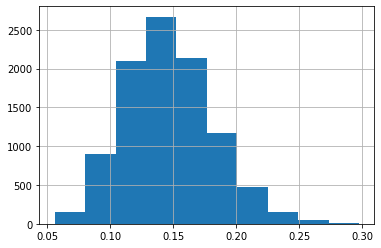

In [28]:
posteriors.hist();

In [29]:
posteriors.describe()

count    9815.000000
mean        0.146631
std         0.035091
min         0.055997
25%         0.121746
50%         0.144323
75%         0.168805
max         0.297275
dtype: float64

What is the 90% credible interval range?

In [34]:
print(posteriors.quantile(0.05))
print(posteriors.quantile(0.95))
#the interval is between 0.093 and 0.20

0.09357589529026164
0.20853312646293704


In [ ]:
n_draws = 100000
interval_range=0.90
sim_data = stats.norm.rvs(size=n_draws)
mean, var, std = stats.bayes_mvs(sim_data, alpha=interval_range)
print(mean)
print(var)
print(std)
#lower, upper: a confidence interval, centered on the median, containing the estimate to a probability alpha
#Result: PValue < 0.05, so we can reject the hypothesis.

What is the Maximum Likelihood Estimate?

In [35]:
rounded = posteriors.round(2)
mode = rounded.mode()

In [36]:
mode

0    0.14
dtype: float64

In [37]:
mode = mode[0]


In [38]:
mode

0.14

In [39]:
len(rounded[rounded == mode]) / len(rounded)

0.11553744268976057

In [ ]:
#11% of the time, gives us the maximum likelihood estimate